## Why NumPy?

- Compact, contiguous arrays of numbers in memory.
- Vectorized operations dispatch to optimized C/BLAS under the hood.
- Expressive APIs for indexing, broadcasting, and linear algebra.
- Foundation for scientific Python (Pandas, SciPy, scikit-learn).

### 1) Review- Creating arrays: 
- Build 1D/2D arrays using `array`, `linspace`, `arange`, and helpers (`zeros`, `ones`, `eye`).

In [2]:
# Add comments to all code in this Notebook
# You have seen this code before
import numpy as np

# 1D arrays
a = np.array([1, 3, 5, 7], dtype=float)
# 2 x 2 array with all integer elements
b = np.array([[1, 2, 3],
              [4, 5, 6]], dtype= int)
x_lin = np.linspace(0.0, 5.0, 11)     # inclusive ends
x_rng = np.arange(0.0, 5.0, 0.5)      # half-open [start, end)

print("a", a) #'a =\n'
print('b', b) #b=\n'
print('lin    =', x_lin)
print('arange =', x_rng)

# 2D helpers
Z = np.zeros((2,3))
O = np.ones((3,2))
I = np.eye(3)
print('zeros:\n', Z)
print('ones:\n',  O)
print('eye:\n',   I)


a [1. 3. 5. 7.]
b [[1 2 3]
 [4 5 6]]
lin    = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
arange = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
eye:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 2) Vectorization 
- Example: velocity of a falling object

velocity(1.0) = 9.8
t = [0.         0.21052632 0.42105263 0.63157895 0.84210526 1.05263158
 1.26315789 1.47368421 1.68421053 1.89473684 2.10526316 2.31578947
 2.52631579 2.73684211 2.94736842 3.15789474 3.36842105 3.57894737
 3.78947368 4.        ]
v = [ 0.          2.06315789  4.12631579  6.18947368  8.25263158 10.31578947
 12.37894737 14.44210526 16.50526316 18.56842105 20.63157895 22.69473684
 24.75789474 26.82105263 28.88421053 30.94736842 33.01052632 35.07368421
 37.13684211 39.2       ]


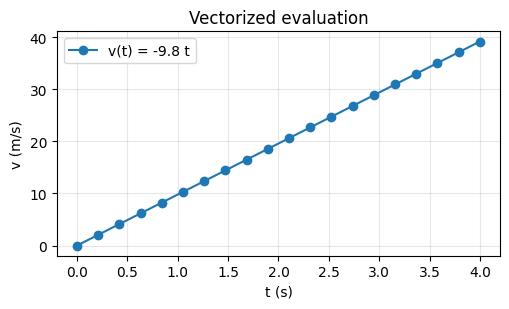

In [2]:
import numpy as np, matplotlib.pyplot as plt #importing numpy and plots

def velocity(t): #defining a variable and its parameter/function and its variable
    g = 9.8  # m/s^2 #variable defined
    v0 = 0.0
    return g * t + v0

# Scalar works
print('velocity(1.0) =', velocity(1.0))

# Vectorized with NumPy
#t = np.array([0,1,2,3,4], dtype=int) # Vactorize t in an array
t=np.linspace(0,4,20) #using linspace
v = velocity(t)
print('t =', t)
print('v =', v)

plt.figure(figsize=(5.2,3.2))
plt.plot(t, v, 'o-', label='v(t) = -9.8 t')
# plt.xlim(0, 4)
plt.xlabel('t (s)'); plt.ylabel('v (m/s)'); plt.title('Vectorized evaluation')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


#### Exercise
Calculate and plot the distance of a falling object with the same initial velocity above. 

Distance traveled: -4.905
time= [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
distance= [-5.00000000e-01 -1.77785866e+00 -6.32156280e+00 -2.24776903e+01
 -7.99243126e+01 -2.84188262e+02 -1.01049312e+03 -3.59302789e+03
 -1.27757915e+04 -4.54271030e+04]


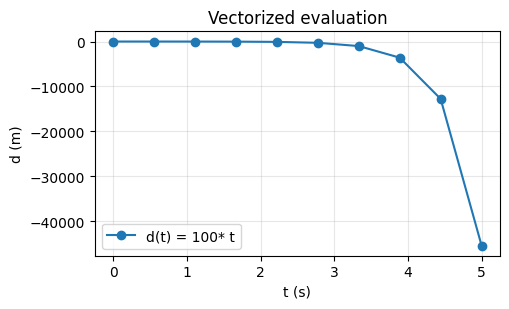

In [6]:
# Your code here
import numpy as np, matplotlib.pyplot as plt
def distance(t) :
    g=9.81
    v_initial=0.00
    x=100.00 #meters
    return -1/2*g**t+v_initial*t
print("Distance traveled:",distance(1))
t=np.linspace(0,5,10)
d=distance(t)
print("time=",t)
print("distance=",d)

#plotting
plt.figure(figsize=(5.2,3.2))
plt.plot(t, d, 'o-', label='d(t) = 100* t')

#plt.xlim(0, 50)
plt.xlabel('t (s)'); plt.ylabel('d (m)'); plt.title('Vectorized evaluation')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

### 3) Indexing & slicing (1D and 2D)
- Use basic **indexing & slicing** (including 2D) and perform in-place assignments.

In [12]:
import numpy as np

#from the quiz
text="Happy Halloween"
print(text[10])
print("Slice:", text[5:8])
print(len(text))

A = np.array([[7., 8., 9.], #2x3 array, shape function will give you the 2x3 definition
              [4., 5., 6.]]) 
print('A=', A, '\nshape =', A.shape)

# Two equivalent ways to index a single element
print('A[1][2] =', A[1][2])
print('A[1,2]  =', A[1,2])

# Row / column slicing
print('Row 0  :', A[0, :])
print('Col 1  :', A[:, 1])

# In-place assignment
A[1, 2] = -A[0, 0]
print('After A[1,2] = -A[0,0]:', A)


o
Slice:  Ha
15
A= [[7. 8. 9.]
 [4. 5. 6.]] 
shape = (2, 3)
A[1][2] = 6.0
A[1,2]  = 6.0
Row 0  : [7. 8. 9.]
Col 1  : [8. 5.]
After A[1,2] = -A[0,0]: [[ 7.  8.  9.]
 [ 4.  5. -7.]]


#### Exercise
Make a 3 x 5 array using the function of your choice. 
Print out 1). a particular row, 2). a particular colum, and 3). a particular element

In [ ]:
#ai
my_array = np.arange(15).reshape(3, 5)
print("The 3x5 array:")
print(my_array)

# 1). Print a particular row (e.g., the second row, which is at index 1)
row_index = 1
print(f"\nRow {row_index}:")
print(my_array[row_index])

# 2). Print a particular column (e.g., the third column, which is at index 2)
column_index = 2
print(f"\nColumn {column_index}:")
print(my_array[:, column_index])

# 3). Print a particular element (e.g., the element at row 0, column 4)
element_row = 0
element_col = 4
print(f"\nElement at row {element_row}, column {element_col}:")
print(my_array[element_row, element_col])

In [5]:
# Your code here
import numpy as np
Matrix = np.array([[4.,8.,10.],
                [5.,9.,12.]])
print("Matrix=",Matrix)

Matrix= [[ 4.  8. 10.]
 [ 5.  9. 12.]]


### 4) Broadcasting: eliminating loops
- Apply **broadcasting** rules to eliminate loops and generate grids. It works by automatically expanding the smaller array across the larger one so that they have compatible shapes.

Examples below build a coordinate grid without explicit loops and compute a distance field.

[[-2.        ]
 [-1.55555556]
 [-1.11111111]
 [-0.66666667]
 [-0.22222222]
 [ 0.22222222]
 [ 0.66666667]
 [ 1.11111111]
 [ 1.55555556]
 [ 2.        ]]
[[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
   0.66666667  1.11111111  1.55555556  2.        ]]


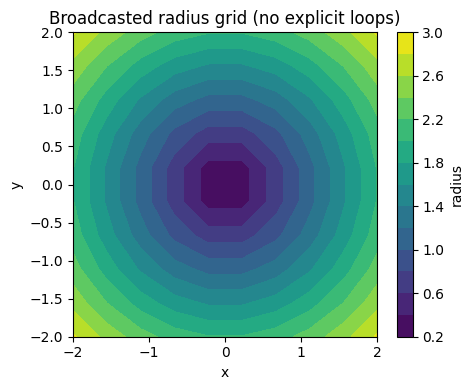

In [6]:
import numpy as np, matplotlib.pyplot as plt

x = np.linspace(-2, 2, num=10, dtype=float)[:, None]   # shape (10,1) column
y = np.linspace(-2, 2, 10, dtype= float)[None, :]   # shape (1,10) row
print(x)
print(y)
X = x + 0*y                             # broadcast to (10,10)
Y = 0*x + y                             # broadcast to (10,10)
R = np.sqrt(X**2 + Y**2)                # element-wise
# print(R)
plt.figure(figsize=(5,4))
plt.contourf(X, Y, R, levels=15, cmap='viridis') #if you delete the f you get the counter without filling
plt.colorbar(label='radius')
plt.gca().set_aspect('equal', 'box')
plt.title('Broadcasted radius grid (no explicit loops)')
plt.xlabel('x'); plt.ylabel('y'); plt.tight_layout(); plt.show()


#### Exercise
Make up a function similar to the example above and plot it. 
Try increase the array sizes and see what heppens.

In [7]:
# Your code here. 


### 5) Dtypes & precision: float32 vs float64
- Choose an appropriate **dtype** and understand precision trade-offs. 

In [8]:
import numpy as np

# A tiny accumulation example
N = 1_000_000_000 # What does this line of code do?
x = np.ones(N, dtype=np.float32) / N
y = np.ones(N, dtype=np.float64) / N
print('sum float32 ≈', x.sum(), ' error=', abs(x.sum()-1.0))
print('sum float64 ≈', y.sum(), ' error=', abs(y.sum()-1.0))
# Run the code and explain what happens.
# Does it take a longer time (compare to other code) to run? Why or why not?

sum float32 ≈ 0.99999994  error= 5.9604645e-08
sum float64 ≈ 1.0000000000000002  error= 2.220446049250313e-16


#### Exercise
Make two arrays using np.array. They have exactly the same elements but different precisions- one of them is float32 and the other one is float 64. Print out the difference of the (third items/1,000,000) in these two arrays. Should it be ZERO?? Why or whynot?

In [9]:
# Your code here


### 6) Reshape & aggregations (axis)

In [10]:
#will be on the exam

In [11]:
import numpy as np
A = np.arange(12)
print('A=', A)
B = np.arange(12).reshape(3,4) # What does this line of code do? Can you fix the error?
print('B=', B)
print('sum over rows (axis=1):', B.sum(axis=1)) # What does this line of code do?
print('mean over cols (axis=0):', B.mean(axis=0)) # What does this line of code does?
B=A.reshape(3,4)
print(B)



A= [ 0  1  2  3  4  5  6  7  8  9 10 11]
B= [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
sum over rows (axis=1): [ 6 22 38]
mean over cols (axis=0): [4. 5. 6. 7.]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### Exercise
Make another array and reshape it. Sum over each row and each colum of this array.

In [14]:
# Your code here
import numpy as np
M = np.arange(16)
print("M:", M)
# show the shape of M (use the .shape attribute on the array)
print("M.shape =", M.shape)
O = np.arange(16)
print("O:", O)


M: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
M.shape = (16,)
O: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


### 7) Quick exercises to connect all the things we have learned so far

#### Exercise
Use NumPy array and matplotlib to plot y= x^3 - 2x. 

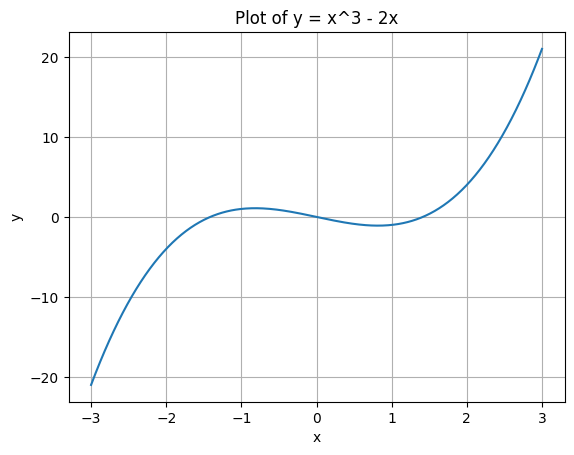

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create an array for x-values
x = np.linspace(-3, 3, 400)  # Generate 400 points between -3 and 3

# 2. Calculate corresponding y-values
y = x**3 - 2 * x

# 3. Plot the data
plt.plot(x, y)

# 4. Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = x^3 - 2x")
plt.grid(True) # Add a grid for better readability

# 5. Display the plot
plt.show()

[[ 4.          4.          4.          4.          4.          4.
   4.          4.          4.          4.        ]
 [ 3.11111111  3.11111111  3.11111111  3.11111111  3.11111111  3.11111111
   3.11111111  3.11111111  3.11111111  3.11111111]
 [ 2.22222222  2.22222222  2.22222222  2.22222222  2.22222222  2.22222222
   2.22222222  2.22222222  2.22222222  2.22222222]
 [ 1.33333333  1.33333333  1.33333333  1.33333333  1.33333333  1.33333333
   1.33333333  1.33333333  1.33333333  1.33333333]
 [ 0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
   0.44444444  0.44444444  0.44444444  0.44444444]
 [-0.44444444 -0.44444444 -0.44444444 -0.44444444 -0.44444444 -0.44444444
  -0.44444444 -0.44444444 -0.44444444 -0.44444444]
 [-1.33333333 -1.33333333 -1.33333333 -1.33333333 -1.33333333 -1.33333333
  -1.33333333 -1.33333333 -1.33333333 -1.33333333]
 [-2.22222222 -2.22222222 -2.22222222 -2.22222222 -2.22222222 -2.22222222
  -2.22222222 -2.22222222 -2.22222222 -2.22222222]
 [-3.111

c:\Users\svitl\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\svitl\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\svitl\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\patches.py:796: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
c:\Users\svitl\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx
c:\Users\svitl\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine(

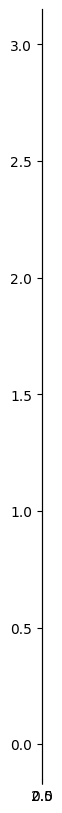

In [ ]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
x=np.array([0,1,2,3,],dtype=int)
y=np.array([0,1,2,3,],dtype=int)
def plotting(x):
    x=0
    y=0
    return x**3-2*X
print(plotting(2))
plt.figure(figsize=(0,10))
plt.plot(x,y,label="y(x)")
#plt.xlim(0,20)
#plt.ylim(0,20)


#### Exercise
The dimensions of your arrays are undeclared initially. Use loops or recrusions to plot the function y= x^3 - 2x. You should get the same plot as above.
Hint: Start with a flowchart. You may use append. 

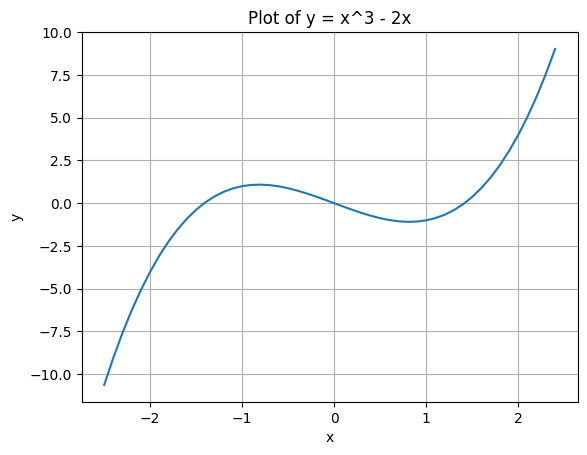

In [16]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# 1. Initialize empty lists for x and y values
x_values = []
y_values = []

# 2. Define the range and step size for x
x = -2.5
x_end = 2.5
step = 0.1

# 3. Use a loop to populate the lists
while x <= x_end:
    # 4. Calculate y
    y = x**3 - 2*x
    
    # 5. Append current x and y to their respective lists
    x_values.append(x)
    y_values.append(y)
    
    # 6. Increment x
    x += step

# 7. Plot the x and y lists
plt.plot(x_values, y_values)
plt.title('Plot of y = x^3 - 2x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


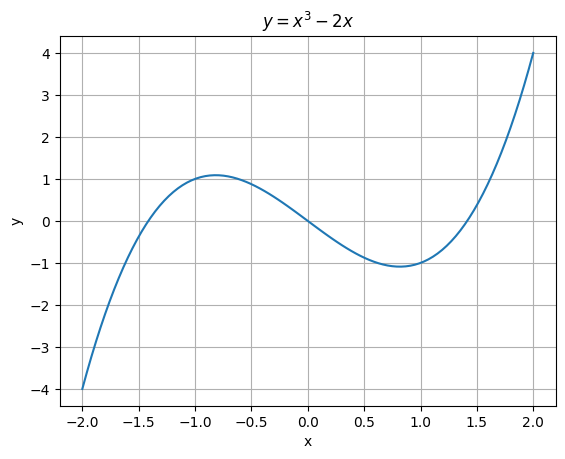

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the range for x using linspace
x = np.linspace(-2, 2, 100)

# Step 2: Initialize an empty list for y-values and use a loop
y = []
for val in x:
    y.append(val**3 - 2*val)

# Step 3: Plot the function
plt.plot(x, y)
plt.title("$y = x^3 - 2x$")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [21]:
fruits = ["apple", "banana", "cherry"]
for fruit in fruits:
    print(fruit)

apple
banana
cherry


In [22]:
count = 0
while count < 5:
    print(count)
    count += 1

0
1
2
3
4


In [23]:
for i in range(3):
    print(i)
else:
    print("Loop finished normally.")

0
1
2
Loop finished normally.
